In [43]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [45]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
776,ham,Why don't you go tell your friend you're not s...,NaN,NaN,NaN
4842,ham,I need details about that online job.,NaN,NaN,NaN
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...,NaN,NaN,NaN
3082,ham,K..k:)how about your training process?,NaN,NaN,NaN
4014,spam,You will be receiving this week's Triple Echo ...,NaN,NaN,NaN


In [46]:
df.shape

(5572, 5)

Data Cleaning

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [48]:
df.columns = df.columns.str.strip()
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [49]:
df.sample(5)

,v1,v2
2316,ham,That's cause your old. I live to be high.
4381,ham,yeah sure thing mate haunt got all my stuff so...
2099,spam,"SMS SERVICES. for your inclusive text credits,..."
2540,ham,"They said if its gonna snow, it will start aro..."
1874,spam,Would you like to see my XXX pics they are so ...


In [50]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5553,ham,Hahaha..use your brain dear
4751,ham,Well boy am I glad G wasted all night at apple...
534,ham,I've not called you in a while. This is hoping...
4075,spam,87077: Kick off a new season with 2wks FREE go...
1397,ham,Then we wait 4 u lor... No need 2 feel bad lar...


In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target']) 


In [52]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [54]:
df.duplicated().sum()

np.int64(403)

In [55]:
df= df.drop_duplicates(keep='first')

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.shape

(5169, 2)

EDA (Exploratory Data Analysis)

In [58]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

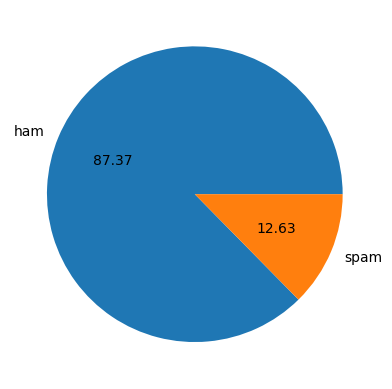

In [60]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [61]:
df['num_characters']=df['text'].apply(len)

In [62]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
df['num_sentences'] = df['text'].apply(lambda x: len(str(x).split('.')))


In [64]:
import re

df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', str(x).strip())) - (1 if re.split(r'[.!?]+', str(x).strip())[-1] == '' else 0))


In [65]:
df['num_words']=df['text'].apply(len)

In [66]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,3,111
1,0,Ok lar... Joking wif u oni...,29,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,155
3,0,U dun say so early hor... U c already then say...,49,2,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,61


In [67]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,2.321145,78.977945
std,58.236293,1.701444,58.236293
min,2.000000,1.000000,2.000000
25%,36.000000,1.000000,36.000000
50%,60.000000,2.000000,60.000000
75%,117.000000,3.000000,117.000000
max,910.000000,39.000000,910.000000


In [68]:
#ham
df[df['target']==0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,2.118468,70.459256
std,56.358207,1.588833,56.358207
min,2.000000,1.000000,2.000000
25%,34.000000,1.000000,34.000000
50%,52.000000,2.000000,52.000000
75%,90.000000,3.000000,90.000000
max,910.000000,39.000000,910.000000


In [69]:
#spam
df[df['target']==1][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,3.722818,137.891271
std,30.137753,1.792465,30.137753
min,13.000000,1.000000,13.000000
25%,132.000000,2.000000,132.000000
50%,149.000000,4.000000,149.000000
75%,157.000000,5.000000,157.000000
max,224.000000,10.000000,224.000000


In [70]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

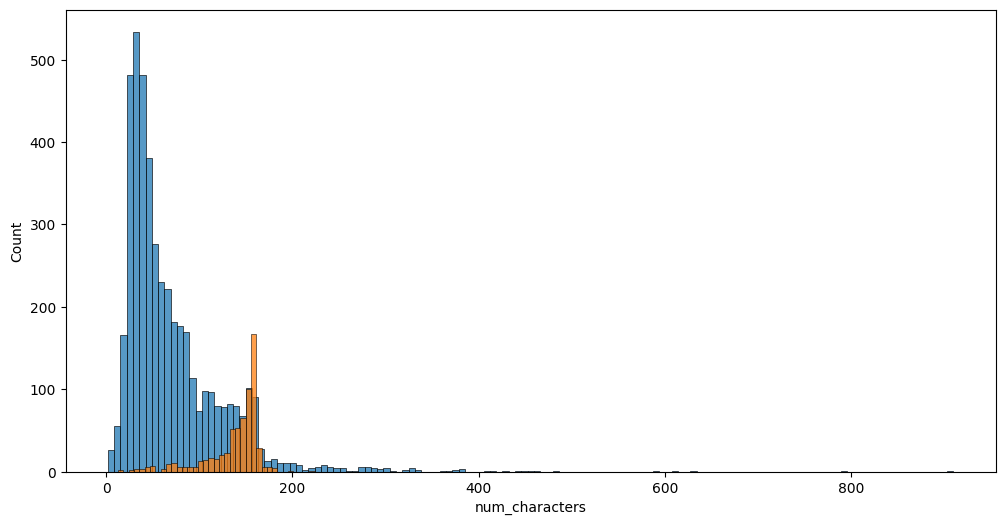

In [71]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_sentences', ylabel='Count'>

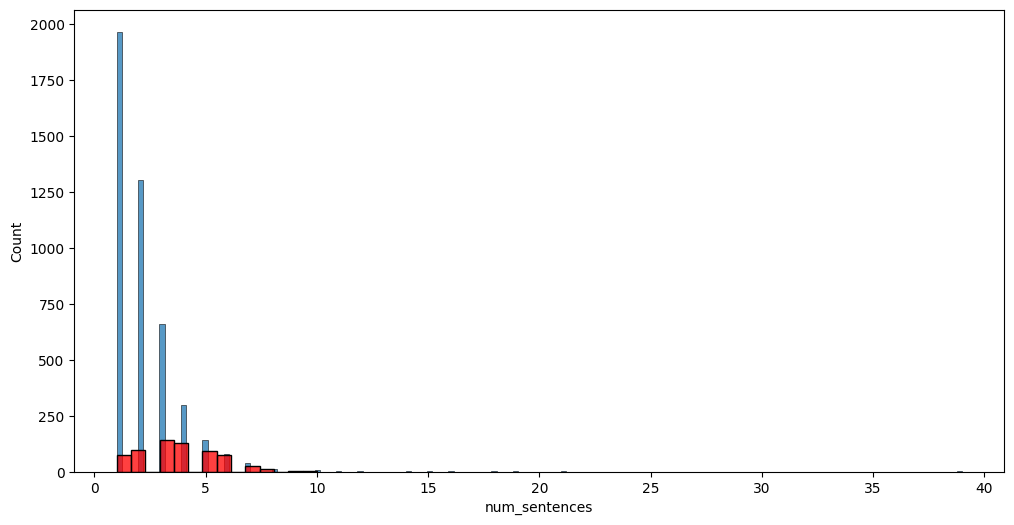

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

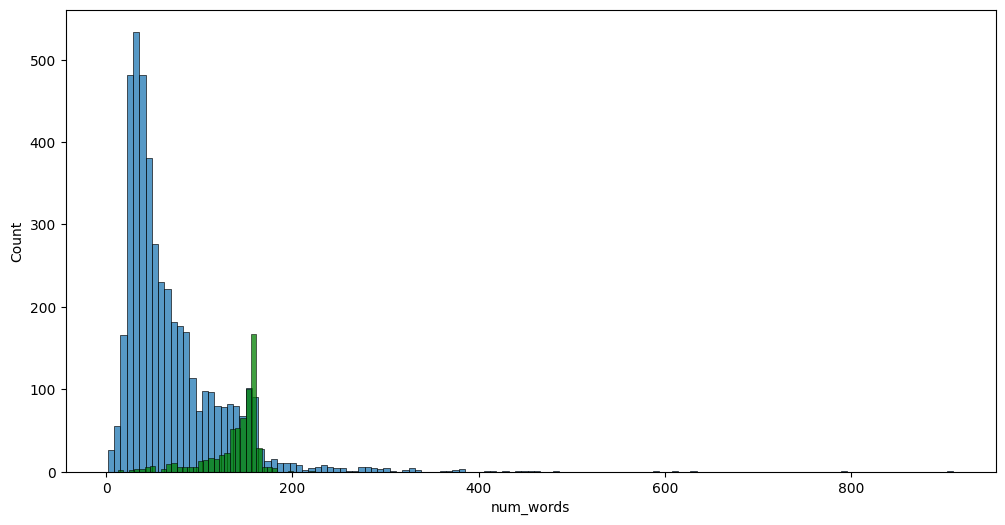

In [73]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

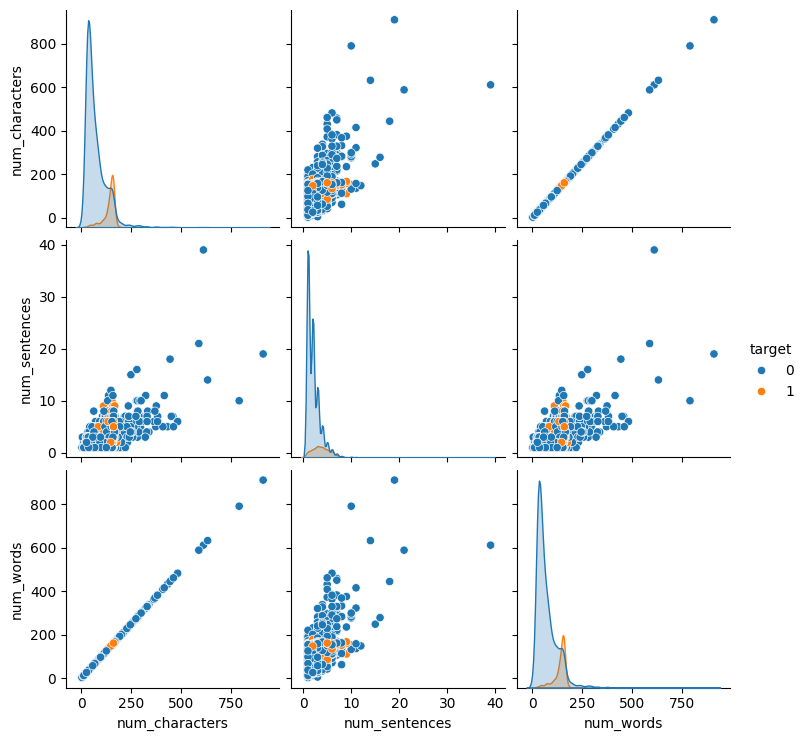

In [74]:
sns.pairplot(df,hue='target')

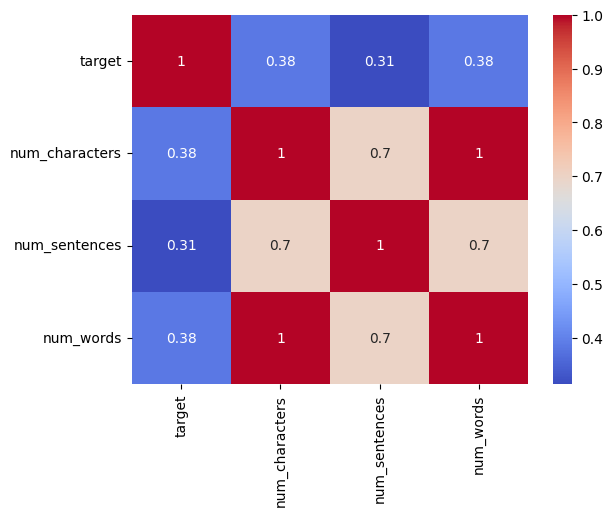

In [75]:
#corelation between the columns
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


Data Processing

In [122]:
# Tocanization (breaking a sentence)
import spacy
nlp = spacy.load("en_core_web_sm")
def clean_text(text):
    text = text.lower() 
    doc = nlp(text) 
    tokens = [token.text for token in doc]  
    return tokens



In [77]:
clean_text('hi how Are you')

['hi', 'how', 'are', 'you']

In [78]:
# remove special characters
def clean_text(text):
    text = text.lower()
    doc = nlp(text)
    
    tokens = []
    for token in doc:
        if token.is_alpha or token.is_digit:
            tokens.append(token.text)
    
    return tokens



In [79]:
clean_text('Hi I got 90% in my Exam #winner')

['hi', 'i', 'got', '90', 'in', 'my', 'exam', 'winner']

In [80]:
#remove stop words and punctuation 
import spacy

nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words

def clean_text(text):
    text = text.lower()
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.is_alpha and token.text not in spacy_stopwords:
            tokens.append(token.text)

    return tokens

In [81]:
clean_text('Did you like my presentstion on ML?')

['like', 'presentstion', 'ml']

In [82]:
df['clean_text']= df['text'].apply(clean_text)

In [83]:
num_words_col = df['num_words']
df.drop(columns='num_words', inplace=True)

df.insert(loc=df.columns.get_loc('clean_text'), column='num_words', value=num_words_col)

In [84]:
df['num_characters'] = df['clean_text'].apply(len)
df['num_sentences'] = df['text'].apply(lambda x: len(list(nlp(x).sents)))  

In [85]:
df.head()

,target,text,num_characters,num_sentences,num_words,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",15,3,111,"[jurong, point, crazy, available, bugis, n, gr..."
1,0,Ok lar... Joking wif u oni...,6,2,29,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,15,2,155,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,6,2,49,"[u, dun, early, hor, u, c]"
4,0,"Nah I don't think he goes to usf, he lives aro...",5,1,61,"[nah, think, goes, usf, lives]"


In [86]:
from wordcloud import WordCloud

spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

spam_text = df[df['target'] == 1]['clean_text'].apply(lambda x: " ".join(x))
spam_wc.generate(" ".join(spam_text))


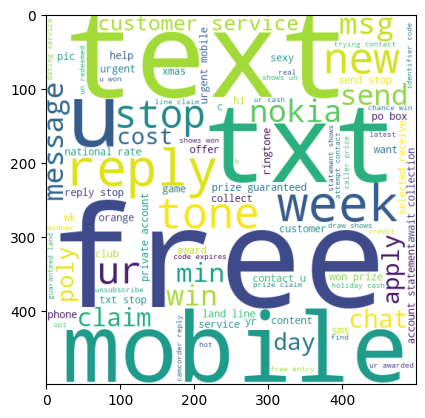

In [87]:
plt.imshow(spam_wc)

In [88]:
from wordcloud import WordCloud

ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

spam_text = df[df['target'] == 0]['clean_text'].apply(lambda x: " ".join(x))
ham_wc.generate(" ".join(spam_text))

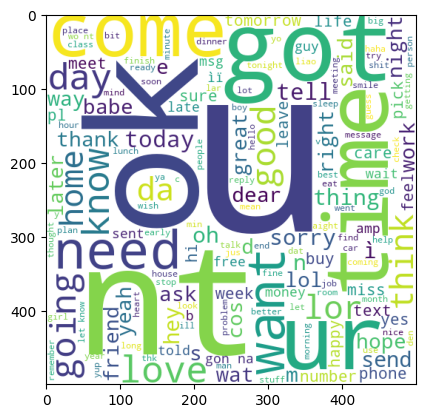

In [89]:
plt.imshow(ham_wc)

In [90]:
df.head()

,target,text,num_characters,num_sentences,num_words,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",15,3,111,"[jurong, point, crazy, available, bugis, n, gr..."
1,0,Ok lar... Joking wif u oni...,6,2,29,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,15,2,155,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,6,2,49,"[u, dun, early, hor, u, c]"
4,0,"Nah I don't think he goes to usf, he lives aro...",5,1,61,"[nah, think, goes, usf, lives]"


In [91]:
spam_corpus = []

for msg in df[df['target'] == 1]['clean_text']:
    for word in msg:
        spam_corpus.append(word)


In [92]:
len(spam_corpus)

7582

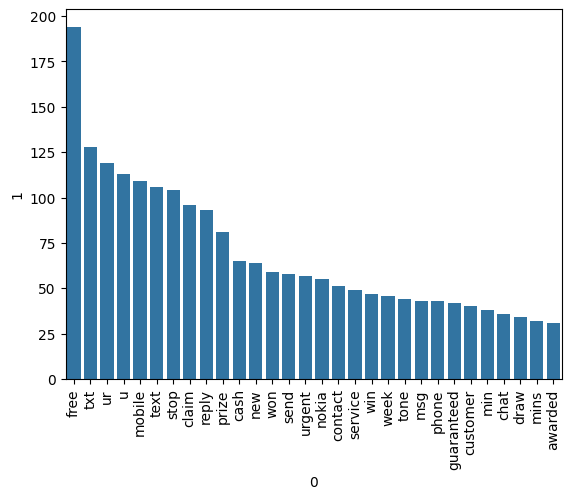

In [93]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical') 
plt.show()



In [94]:
ham_corpus = []

for msg in df[df['target'] == 0]['clean_text']:
    for word in msg:
        ham_corpus.append(word)

In [95]:
len(ham_corpus)

29879

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'nt'),
  Text(2, 0, 'ok'),
  Text(3, 0, 'got'),
  Text(4, 0, 'know'),
  Text(5, 0, 'like'),
  Text(6, 0, 'come'),
  Text(7, 0, 'good'),
  Text(8, 0, 'ur'),
  Text(9, 0, 'time'),
  Text(10, 0, 'day'),
  Text(11, 0, 'love'),
  Text(12, 0, 'going'),
  Text(13, 0, 'want'),
  Text(14, 0, 'lor'),
  Text(15, 0, 'need'),
  Text(16, 0, 'home'),
  Text(17, 0, 'da'),
  Text(18, 0, 'think'),
  Text(19, 0, 'today'),
  Text(20, 0, 'n'),
  Text(21, 0, 'sorry'),
  Text(22, 0, 'ì'),
  Text(23, 0, 'r'),
  Text(24, 0, 'tell'),
  Text(25, 0, 'send'),
  Text(26, 0, 'hi'),
  Text(27, 0, 'oh'),
  Text(28, 0, 'wat'),
  Text(29, 0, 'night')])

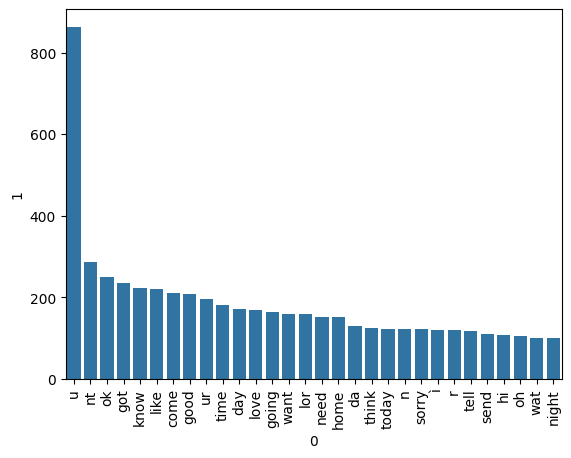

In [96]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [97]:
df.head()

,target,text,num_characters,num_sentences,num_words,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",15,3,111,"[jurong, point, crazy, available, bugis, n, gr..."
1,0,Ok lar... Joking wif u oni...,6,2,29,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,15,2,155,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,6,2,49,"[u, dun, early, hor, u, c]"
4,0,"Nah I don't think he goes to usf, he lives aro...",5,1,61,"[nah, think, goes, usf, lives]"


Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
df['clean_text_joined'] = df['clean_text'].apply(lambda x: " ".join(x))
X = tfidf.fit_transform(df['clean_text_joined']).toarray()


In [100]:
X.shape

(5169, 6988)

In [101]:
y = df['target'].values

In [102]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [106]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [107]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[777 119]
 [ 26 112]]
0.48484848484848486


In [108]:
#keep this as good precision score
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [109]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[889   7]
 [ 29 109]]
0.9396551724137931


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier

In [111]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2, n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=10, random_state=2, n_jobs=-1)  # reduced for speed
etc = ExtraTreesClassifier(n_estimators=50, random_state=2, n_jobs=-1)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2, n_jobs=-1, verbosity=0)

In [112]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [113]:
import spacy
nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words

def clean_text(text):
    text = text.lower()
    doc = nlp(text)
    return [token.text for token in doc if token.is_alpha and token.text not in spacy_stopwords]

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)


In [114]:
df['clean_text_joined'] = df['clean_text'].apply(lambda x: " ".join(x))


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create joined text for TF-IDF
df['clean_text_joined'] = df['clean_text'].apply(lambda x: " ".join(x))

# TF-IDF vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text_joined']).toarray()

# Target variable
y = df['target']  # make sure 'target' column exists

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [116]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision


In [117]:
train_classifier(svc, X_train, y_train, X_test, y_test)


(0.9690522243713733, 0.9491525423728814)

In [118]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    return accuracy, precision

# Train and collect results
results = []
for name, clf in clfs.items():
    print(f"Training {name}...")
    acc, prec = train_classifier(clf, X_train, y_train, X_test, y_test)
    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec})

#Display results as DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

Training SVC...
Training KN...
Training NB...
Training DT...
Training LR...
Training RF...
Training AdaBoost...
Training BgC...
Training ETC...
Training GBDT...
Training XGB...
       Model  Accuracy  Precision
0        SVC  0.969052   0.968618
1         KN  0.908124   0.916931
2         NB  0.959381   0.961200
3         DT  0.918762   0.914653
4         LR  0.941973   0.940705
5         RF  0.969052   0.969170
6   AdaBoost  0.896518   0.896610
7        BgC  0.953578   0.952005
8        ETC  0.973888   0.974106
9       GBDT  0.936170   0.936338
10       XGB  0.971954   0.972234


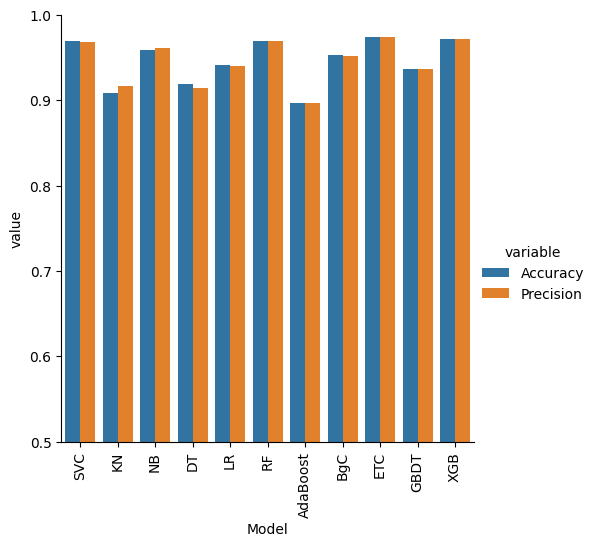

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x='Model',
    y='value',
    hue='variable',
    data=results_df.melt(id_vars='Model'),  # melt to long format
    kind='bar',
    height=5
)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

        

In [120]:
best_model = results_df.iloc[0]
print(f"Best Model: {best_model['Model']} (Accuracy: {best_model['Accuracy']:.4f}, Precision: {best_model['Precision']:.4f})")


Best Model: SVC (Accuracy: 0.9691, Precision: 0.9686)


In [121]:
from sklearn.naive_bayes import MultinomialNB
import pickle

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text'])  
y = df['target']
mnb = MultinomialNB()
mnb.fit(X, y)
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

